In [18]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import tree
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [19]:
data = arff.loadarff('KC1.arff')
df = pd.DataFrame(data[0])
df.head()

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,...,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,Defective
0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0,11.58,2.67,...,11.0,0.38,4.57,30.88,4.0,7.0,3.0,4.0,5.0,b'N'
1,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.00,0.00,...,1.0,0.00,0.00,0.00,0.0,1.0,0.0,1.0,3.0,b'N'
2,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.00,0.00,...,1.0,0.00,0.00,0.00,0.0,1.0,0.0,1.0,3.0,b'N'
3,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.00,0.00,...,1.0,0.00,0.00,0.00,0.0,1.0,0.0,1.0,3.0,b'N'
4,2.0,1.0,0.0,0.0,1.0,1.0,1.0,8.0,18.03,3.50,...,19.0,0.29,12.27,63.12,7.0,12.0,5.0,5.0,12.0,b'N'


In [20]:
from scipy.io import arff

# Load ARFF file
file_path='KC1.arff'
data, meta=arff.loadarff(file_path)

# Convert data to a list of dictionaries for easier access
data_list = [dict(zip(meta.names(), row)) for row in data]

# Display entire rows
for row in data_list:
    print(row)

#menampilkan seluruh baris data

{'LOC_BLANK': 0.0, 'BRANCH_COUNT': 1.0, 'LOC_CODE_AND_COMMENT': 0.0, 'LOC_COMMENTS': 0.0, 'CYCLOMATIC_COMPLEXITY': 1.0, 'DESIGN_COMPLEXITY': 1.0, 'ESSENTIAL_COMPLEXITY': 1.0, 'LOC_EXECUTABLE': 3.0, 'HALSTEAD_CONTENT': 11.58, 'HALSTEAD_DIFFICULTY': 2.67, 'HALSTEAD_EFFORT': 82.35, 'HALSTEAD_ERROR_EST': 0.01, 'HALSTEAD_LENGTH': 11.0, 'HALSTEAD_LEVEL': 0.38, 'HALSTEAD_PROG_TIME': 4.57, 'HALSTEAD_VOLUME': 30.88, 'NUM_OPERANDS': 4.0, 'NUM_OPERATORS': 7.0, 'NUM_UNIQUE_OPERANDS': 3.0, 'NUM_UNIQUE_OPERATORS': 4.0, 'LOC_TOTAL': 5.0, 'Defective': b'N'}
{'LOC_BLANK': 0.0, 'BRANCH_COUNT': 1.0, 'LOC_CODE_AND_COMMENT': 0.0, 'LOC_COMMENTS': 0.0, 'CYCLOMATIC_COMPLEXITY': 1.0, 'DESIGN_COMPLEXITY': 1.0, 'ESSENTIAL_COMPLEXITY': 1.0, 'LOC_EXECUTABLE': 1.0, 'HALSTEAD_CONTENT': 0.0, 'HALSTEAD_DIFFICULTY': 0.0, 'HALSTEAD_EFFORT': 0.0, 'HALSTEAD_ERROR_EST': 0.0, 'HALSTEAD_LENGTH': 1.0, 'HALSTEAD_LEVEL': 0.0, 'HALSTEAD_PROG_TIME': 0.0, 'HALSTEAD_VOLUME': 0.0, 'NUM_OPERANDS': 0.0, 'NUM_OPERATORS': 1.0, 'NUM_UNIQ

In [21]:
# Untuk melihat deskripsi singkat data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOC_BLANK              2096 non-null   float64
 1   BRANCH_COUNT           2096 non-null   float64
 2   LOC_CODE_AND_COMMENT   2096 non-null   float64
 3   LOC_COMMENTS           2096 non-null   float64
 4   CYCLOMATIC_COMPLEXITY  2096 non-null   float64
 5   DESIGN_COMPLEXITY      2096 non-null   float64
 6   ESSENTIAL_COMPLEXITY   2096 non-null   float64
 7   LOC_EXECUTABLE         2096 non-null   float64
 8   HALSTEAD_CONTENT       2096 non-null   float64
 9   HALSTEAD_DIFFICULTY    2096 non-null   float64
 10  HALSTEAD_EFFORT        2096 non-null   float64
 11  HALSTEAD_ERROR_EST     2096 non-null   float64
 12  HALSTEAD_LENGTH        2096 non-null   float64
 13  HALSTEAD_LEVEL         2096 non-null   float64
 14  HALSTEAD_PROG_TIME     2096 non-null   float64
 15  HALS

In [ ]:
df.describe()

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,...,HALSTEAD_ERROR_EST,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL
count,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,...,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2096.00000,2096.00000,2096.000000,2096.000000
mean,1.769084,4.676050,0.132156,0.950382,2.843034,2.549618,1.678435,14.614027,21.370711,6.812142,...,0.086178,50.137405,0.320468,293.050329,260.300134,18.902195,31.23521,9.59542,7.677958,20.370229
std,3.866646,7.814833,0.704704,3.093981,3.912123,3.385836,2.206874,24.236885,21.502630,7.870707,...,0.172781,83.767015,0.316092,971.895369,517.514061,32.140094,51.87911,12.21105,5.717687,29.832841
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,5.330000,1.500000,...,0.000000,4.000000,0.080000,0.670000,8.000000,1.000000,3.00000,1.00000,3.000000,3.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5.000000,14.450000,3.500000,...,0.020000,17.000000,0.200000,12.270000,58.810000,6.000000,10.00000,5.00000,6.000000,9.000000
75%,2.000000,5.000000,0.000000,0.000000,3.000000,3.000000,1.000000,17.000000,29.880000,9.315000,...,0.090000,58.000000,0.670000,127.090000,270.510000,22.000000,36.00000,13.00000,11.000000,24.000000
max,58.000000,89.000000,12.000000,44.000000,45.000000,45.000000,26.000000,262.000000,193.060000,53.750000,...,2.640000,1106.000000,2.000000,18044.640000,7918.820000,428.000000,678.00000,120.00000,37.000000,288.000000


In [ ]:
df.isna().sum().sort_values(ascending = False)

LOC_BLANK                0
BRANCH_COUNT             0
LOC_TOTAL                0
NUM_UNIQUE_OPERATORS     0
NUM_UNIQUE_OPERANDS      0
NUM_OPERATORS            0
NUM_OPERANDS             0
HALSTEAD_VOLUME          0
HALSTEAD_PROG_TIME       0
HALSTEAD_LEVEL           0
HALSTEAD_LENGTH          0
HALSTEAD_ERROR_EST       0
HALSTEAD_EFFORT          0
HALSTEAD_DIFFICULTY      0
HALSTEAD_CONTENT         0
LOC_EXECUTABLE           0
ESSENTIAL_COMPLEXITY     0
DESIGN_COMPLEXITY        0
CYCLOMATIC_COMPLEXITY    0
LOC_COMMENTS             0
LOC_CODE_AND_COMMENT     0
Defective                0
dtype: int64

### TRANFORMASI DATASET

In [22]:
ind_col = [col for col in df.columns if col != 'Defective']
dep_col = 'Defective'

In [23]:
df[dep_col].value_counts()

b'N'    1771
b'Y'     325
Name: Defective, dtype: int64

### DATA PREPROCESSING LABEL ENCODER

In [24]:
from sklearn.preprocessing import LabelEncoder
# label encoding > special handling for class
label_encoder = LabelEncoder() # Create an instance of LabelEncoder

# Fit and transform the 'label' column
df['Defective'] = label_encoder.fit_transform(df['Defective'])

# show
df.head()

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,...,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,Defective
0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0,11.58,2.67,...,11.0,0.38,4.57,30.88,4.0,7.0,3.0,4.0,5.0,0
1,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.00,0.00,...,1.0,0.00,0.00,0.00,0.0,1.0,0.0,1.0,3.0,0
2,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.00,0.00,...,1.0,0.00,0.00,0.00,0.0,1.0,0.0,1.0,3.0,0
3,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.00,0.00,...,1.0,0.00,0.00,0.00,0.0,1.0,0.0,1.0,3.0,0
4,2.0,1.0,0.0,0.0,1.0,1.0,1.0,8.0,18.03,3.50,...,19.0,0.29,12.27,63.12,7.0,12.0,5.0,5.0,12.0,0


In [27]:
value_to_search = 0
filtered_df = df[df['Defective'] == value_to_search]

filtered_df

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,...,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,Defective
0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0,11.58,2.67,...,11.0,0.38,4.57,30.88,4.0,7.0,3.0,4.0,5.0,0
1,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.00,0.00,...,1.0,0.00,0.00,0.00,0.0,1.0,0.0,1.0,3.0,0
2,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.00,0.00,...,1.0,0.00,0.00,0.00,0.0,1.0,0.0,1.0,3.0,0
3,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.00,0.00,...,1.0,0.00,0.00,0.00,0.0,1.0,0.0,1.0,3.0,0
4,2.0,1.0,0.0,0.0,1.0,1.0,1.0,8.0,18.03,3.50,...,19.0,0.29,12.27,63.12,7.0,12.0,5.0,5.0,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,2.0,3.0,0.0,1.0,2.0,2.0,1.0,12.0,25.77,6.82,...,40.0,0.15,66.55,175.69,15.0,25.0,11.0,10.0,19.0,0
2090,2.0,5.0,0.0,1.0,3.0,3.0,3.0,18.0,28.75,9.69,...,60.0,0.10,150.03,278.63,21.0,39.0,13.0,12.0,23.0,0
2091,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,5.33,1.50,...,4.0,0.67,0.67,8.00,1.0,3.0,1.0,3.0,2.0,0
2092,5.0,1.0,0.0,0.0,1.0,1.0,1.0,6.0,15.24,4.00,...,17.0,0.25,13.54,60.94,8.0,9.0,6.0,6.0,13.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOC_BLANK              2096 non-null   float64
 1   BRANCH_COUNT           2096 non-null   float64
 2   LOC_CODE_AND_COMMENT   2096 non-null   float64
 3   LOC_COMMENTS           2096 non-null   float64
 4   CYCLOMATIC_COMPLEXITY  2096 non-null   float64
 5   DESIGN_COMPLEXITY      2096 non-null   float64
 6   ESSENTIAL_COMPLEXITY   2096 non-null   float64
 7   LOC_EXECUTABLE         2096 non-null   float64
 8   HALSTEAD_CONTENT       2096 non-null   float64
 9   HALSTEAD_DIFFICULTY    2096 non-null   float64
 10  HALSTEAD_EFFORT        2096 non-null   float64
 11  HALSTEAD_ERROR_EST     2096 non-null   float64
 12  HALSTEAD_LENGTH        2096 non-null   float64
 13  HALSTEAD_LEVEL         2096 non-null   float64
 14  HALSTEAD_PROG_TIME     2096 non-null   float64
 15  HALS

### FEATURE SCALING

In [28]:
# Pre-processing dataset yang digunakan
# Normalisasi min max -> pembagian data dengan yang data terbesar
scaler = MinMaxScaler()
# axis = 1 -> mempresentasifkan label di kolom
# axis = 0 -> mempresentasifkan label di row
# Untuk menormalisasikan data menggunakan min max
scaled_data = scaler.fit_transform(df.drop('Defective', axis = 1))
# Untuk menambahka kolom pada data
preprocessed_data = pd.DataFrame(scaled_data, columns = df.columns[:-1])
# Untuk menambahkan kolom defect
print(df)

      LOC_BLANK  BRANCH_COUNT  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0           0.0           1.0                   0.0           0.0   
1           0.0           1.0                   0.0           0.0   
2           0.0           1.0                   0.0           0.0   
3           0.0           1.0                   0.0           0.0   
4           2.0           1.0                   0.0           0.0   
...         ...           ...                   ...           ...   
2091        0.0           1.0                   0.0           0.0   
2092        5.0           1.0                   0.0           0.0   
2093        0.0           9.0                   0.0           0.0   
2094        2.0          13.0                   0.0           0.0   
2095        0.0           3.0                   0.0           0.0   

      CYCLOMATIC_COMPLEXITY  DESIGN_COMPLEXITY  ESSENTIAL_COMPLEXITY  \
0                       1.0                1.0                   1.0   
1                       1.0

In [29]:
# Standar machine learning / penamaan variable
# X -> 20 fitur yang telah di normalisasi
X = preprocessed_data
# Y -> label yang akan diprediksi atau kolom defects
Y = df['Defective']
print(X)
# X.info()

      LOC_BLANK  BRANCH_COUNT  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0      0.000000      0.000000                   0.0           0.0   
1      0.000000      0.000000                   0.0           0.0   
2      0.000000      0.000000                   0.0           0.0   
3      0.000000      0.000000                   0.0           0.0   
4      0.034483      0.000000                   0.0           0.0   
...         ...           ...                   ...           ...   
2091   0.000000      0.000000                   0.0           0.0   
2092   0.086207      0.000000                   0.0           0.0   
2093   0.000000      0.090909                   0.0           0.0   
2094   0.034483      0.136364                   0.0           0.0   
2095   0.000000      0.022727                   0.0           0.0   

      CYCLOMATIC_COMPLEXITY  DESIGN_COMPLEXITY  ESSENTIAL_COMPLEXITY  \
0                  0.000000           0.000000                  0.00   
1                  0.000000

### SMOTE

<Axes: xlabel='Defective', ylabel='count'>

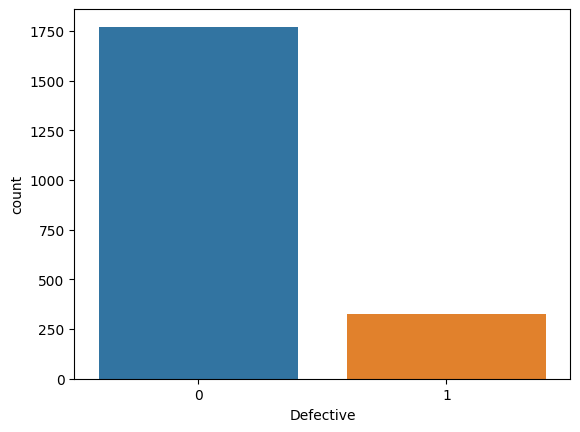

In [30]:
# Get the value counts
sns.countplot(df, x="Defective")

In [31]:
# Penyeimbangan class dengan menggunakan SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X, Y = smote.fit_resample(X, Y)

Defective
0            1771
1            1771
dtype: int64



Text(0.5, 1.0, 'Train Class')

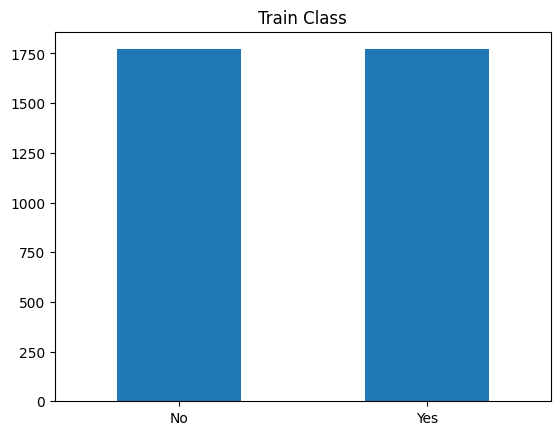

In [32]:
# imbalanced class
df_Y = pd.DataFrame(Y)
print(f'{df_Y.value_counts()}\n')

df_Y.value_counts().plot(kind='bar')
plt.xticks([0, 1],['No','Yes'], rotation=0)
plt.xlabel('')
plt.title('Train Class')

### EDA

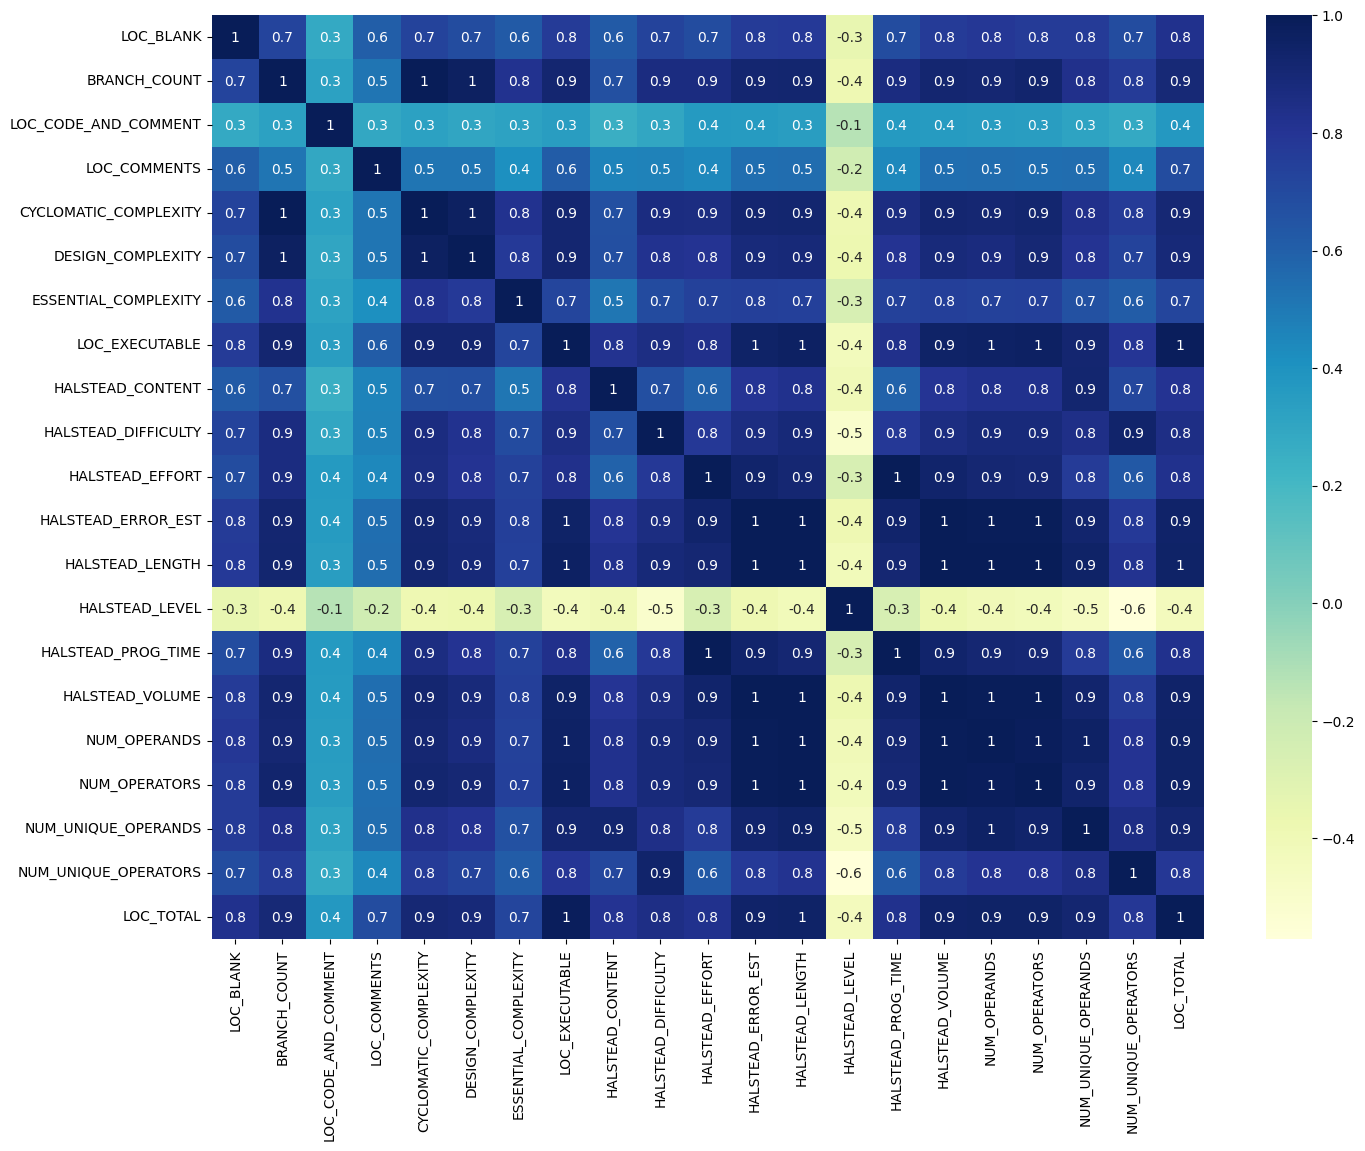

In [ ]:
# heatmap
plt.figure(figsize = (16,12))
sns.heatmap(df.iloc[:, :-1].corr(), annot = True, fmt = '.1g', cmap = 'YlGnBu')
plt.show()

In [45]:
X

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,...,HALSTEAD_ERROR_EST,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011450,0.059981,0.049674,...,0.003788,0.009946,0.190000,0.000253,0.003900,0.009346,0.010324,0.025000,0.108108,0.013937
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003817,0.000000,0.000000,...,0.000000,0.000904,0.000000,0.000000,0.000000,0.000000,0.001475,0.000000,0.027027,0.006969
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003817,0.000000,0.000000,...,0.000000,0.000904,0.000000,0.000000,0.000000,0.000000,0.001475,0.000000,0.027027,0.006969
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003817,0.000000,0.000000,...,0.000000,0.000904,0.000000,0.000000,0.000000,0.000000,0.001475,0.000000,0.027027,0.006969
4,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030534,0.093391,0.065116,...,0.007576,0.017179,0.145000,0.000680,0.007971,0.016355,0.017699,0.041667,0.135135,0.038328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3537,0.047058,0.097059,0.000000,0.078608,0.097059,0.097059,0.000000,0.156489,0.265164,0.239575,...,0.083646,0.112957,0.037294,0.026305,0.082928,0.112535,0.113223,0.211469,0.363751,0.168846
3538,0.022483,0.026182,0.083333,0.003455,0.026182,0.026182,0.000000,0.039573,0.100540,0.138855,...,0.019515,0.033020,0.065000,0.003336,0.018312,0.031795,0.033794,0.062134,0.220325,0.054077
3539,0.034483,0.059066,0.000000,0.000000,0.059066,0.018231,0.000000,0.090093,0.129863,0.231590,...,0.038649,0.060414,0.040000,0.011957,0.039405,0.064958,0.057546,0.111676,0.324324,0.098958
3540,0.034483,0.081815,0.000000,0.009094,0.081815,0.068182,0.047988,0.129771,0.175383,0.245062,...,0.055302,0.082278,0.037999,0.018063,0.056278,0.079438,0.084071,0.139996,0.351351,0.130314


In [46]:
y = Y

In [39]:
!pip install pyswarms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 1.8 MB/s eta 0:00:00


In [40]:
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import pandas as pd
import pyswarms as ps
from sklearn.naive_bayes import GaussianNB


In [48]:
# Define the fitness function
def fitness_function(x):
    selected_features = np.where(x == 1)[0]
    if len(selected_features) == 0:
      return 0
    else:
       clf = MultinomialNB()
       scores = cross_val_score(clf, X[:, selected_features], y,cv=5)
       return np.mean(scores)


In [49]:
# Set up the PSO optimizer
n_particles = 50
dimensions = 242
options = {'c1': 3, 'c2': 5, 'w': 0.8}


In [50]:
# Run the optimization process
Optimizer	=	ps.single.GlobalBestPSO(n_particles=n_particles, dimensions=dimensions, options=options)
cost, pos = Optimizer.optimize(fitness_function, iters=1300)


2023-12-08 15:57:20,774 - pyswarms.single.global_best - INFO - Optimize for 1300 iters with {'c1': 3, 'c2': 5, 'w': 0.8}
pyswarms.single.global_best:  90%|████████▉ |1164/1300, best_cost=0/usr/local/lib/python3.10/dist-packages/pyswarms/backend/operators.py:138: RuntimeWarning: overflow encountered in multiply
  c2
pyswarms.single.global_best:  90%|████████▉ |1164/1300, best_cost=0/usr/local/lib/python3.10/dist-packages/pyswarms/backend/operators.py:143: RuntimeWarning: invalid value encountered in add
  temp_velocity = (w * swarm.velocity) + cognitive + social
pyswarms.single.global_best:  90%|████████▉ |1164/1300, best_cost=0/usr/local/lib/python3.10/dist-packages/pyswarms/backend/operators.py:133: RuntimeWarning: overflow encountered in multiply
  c1
pyswarms.single.global_best:  95%|█████████▍|1233/1300, best_cost=0/usr/local/lib/python3.10/dist-packages/pyswarms/backend/operators.py:143: RuntimeWarning: overflow encountered in add
  temp_velocity = (w * swarm.velocity) + cognitive

In [51]:
# Get the selected features
selected_features = np.where(pos >= 0.5)[0]
print("Selected features:", selected_features)
print(len(selected_features))


Selected features: [  0   1   4   5   6   7   8  10  11  12  14  16  19  20  21  23  25  26
  27  28  32  33  34  37  40  44  47  49  53  54  55  56  57  67  69  72
  73  75  76  77  78  84  85  86  87  88  89  91  94  95 100 102 103 105
 106 107 108 110 111 112 117 119 121 122 124 125 127 128 130 131 140 143
 146 147 149 151 152 153 154 156 157 158 160 161 163 165 169 170 171 177
 178 180 181 182 183 193 196 197 201 204 205 208 211 212 214 215 216 221
 226 228 230 231 232 233 235 238 240 241]
118


In [54]:
len(selected_features)

118

In [59]:
X_pso = def.iloc[:, selected_features]
X_pso.head()

SyntaxError: ignored

### SPLITING DATA

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

print("\n shape of train split: ")
print(X_train.shape, Y_train.shape)
print("\n shape of train split: ")
print(X_test.shape, Y_test.shape)


 shape of train split: 
(2833, 21) (2833,)

 shape of train split: 
(709, 21) (709,)


### MODEL BUILDING

DECISION TRES

In [ ]:
# Pemanggilan model Decision Tree
clfDct = tree.DecisionTreeClassifier()
# Melatih data
clfDct.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
dt=DecisionTreeClassifier(max_depth=10,criterion="gini")
dt.fit(X_train,Y_train)
predictions = dt.predict(X_test)
accdt=accuracy_score(Y_test, predictions)*100
print("Accuracy of Decision Tree (%): \n",accdt)
#get FPR
recalldt=recall_score(Y_test,predictions)*100
print("Recall of Decision Tree is: \n",recalldt)
precdt=precision_score(Y_test,predictions)*100
print("Precision of Decision Tree is: \n",precdt)

Accuracy of Decision Tree (%): 
 84.76727785613541
Recall of Decision Tree is: 
 83.70165745856355
Precision of Decision Tree is: 
 86.07954545454545


In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       347
           1       0.86      0.84      0.85       362

    accuracy                           0.85       709
   macro avg       0.85      0.85      0.85       709
weighted avg       0.85      0.85      0.85       709



# SVM

In [ ]:
from sklearn.model_selection import cross_val_score
svm=clf = SVC(gamma="auto",kernel='linear',degree=3, C=1, random_state=99)
svm.fit(X_train,Y_train)
predictions = svm.predict(X_test)
accsvm=accuracy_score(Y_test, predictions)*100
print("Accuracy of Support Vector Machine (%): \n",accsvm)
#get FPR
recallsvm=recall_score(Y_test,predictions)*100
print("Recall of Support Vector Machine is: \n",recallsvm)
precsvm=precision_score(Y_test,predictions)*100
print("Precision of Support Vector Machine is: \n",precsvm)

Accuracy of Support Vector Machine (%): 
 71.65021156558534
Recall of Support Vector Machine is: 
 75.13812154696133
Precision of Support Vector Machine is: 
 71.01827676240208


In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       347
           1       0.86      0.84      0.85       362

    accuracy                           0.85       709
   macro avg       0.85      0.85      0.85       709
weighted avg       0.85      0.85      0.85       709



# RANDOM FOREST

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
predictions = rf.predict(X_test)
accrf=accuracy_score(Y_test, predictions)*100
print("Accuracy of Random Forest (%): \n",accrf)
#get FPR
recallrf=recall_score(Y_test,predictions)*100
print("Recall of Random Forest is: \n",recallrf)
precrf=precision_score(Y_test,predictions)*100
print("Precision of Random Forest is: \n",precrf)

Accuracy of Random Forest (%): 
 91.25528913963329
Recall of Random Forest is: 
 93.646408839779
Precision of Random Forest is: 
 89.68253968253968


In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       347
           1       0.90      0.94      0.92       362

    accuracy                           0.91       709
   macro avg       0.91      0.91      0.91       709
weighted avg       0.91      0.91      0.91       709



# NAIVE BAYES

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, Y_train)
predictions = naive_bayes.predict(X_test)
accnaive_bayes=accuracy_score(Y_test, predictions)*100
print("Accuracy of Naive Bayes (%): \n",accnaive_bayes)
#get FPR
recallnaive_bayes=recall_score(Y_test,predictions)*100
print("Recall of Naive Bayes is: \n",recallnaive_bayes)
precnaive_bayes=precision_score(Y_test,predictions)*100
print("Precision of Naive Bayes is: \n",precnaive_bayes)

Accuracy of Naive Bayes (%): 
 66.43159379407616
Recall of Naive Bayes is: 
 41.71270718232044
Precision of Naive Bayes is: 
 84.8314606741573


In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.60      0.92      0.73       347
           1       0.85      0.42      0.56       362

    accuracy                           0.66       709
   macro avg       0.73      0.67      0.64       709
weighted avg       0.73      0.66      0.64       709



improv menggunakan boosting

In [ ]:
print(df.columns)

Index(['LOC_BLANK', 'BRANCH_COUNT', 'LOC_CODE_AND_COMMENT', 'LOC_COMMENTS',
       'CYCLOMATIC_COMPLEXITY', 'DESIGN_COMPLEXITY', 'ESSENTIAL_COMPLEXITY',
       'LOC_EXECUTABLE', 'HALSTEAD_CONTENT', 'HALSTEAD_DIFFICULTY',
       'HALSTEAD_EFFORT', 'HALSTEAD_ERROR_EST', 'HALSTEAD_LENGTH',
       'HALSTEAD_LEVEL', 'HALSTEAD_PROG_TIME', 'HALSTEAD_VOLUME',
       'NUM_OPERANDS', 'NUM_OPERATORS', 'NUM_UNIQUE_OPERANDS',
       'NUM_UNIQUE_OPERATORS', 'LOC_TOTAL', 'Defective'],
      dtype='object')


In [ ]:
# Pisahkan fitur dan label
X = df.drop('HALSTEAD_PROG_TIME', axis=1)
y = df['DESIGN_COMPLEXITY']

In [ ]:
# Misalnya, jika file CSV bernama 'dataset.csv'
data, meta = arff.loadarff('KC1.arff')

# Pisahkan fitur dan label
X = df.drop('HALSTEAD_PROG_TIME', axis=1)
y = df['DESIGN_COMPLEXITY']

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


MODEL

In [ ]:
# Model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Model Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Model XGBoost
xgb_model = XGBClassifier(n_estimators=100, random_state=42)


In [ ]:
# Buat ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('gb', gb_model),
    ('xgb', xgb_model)
], voting='soft')


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)


In [ ]:
ensemble_model.fit(X_train, y_train)


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_ty...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [ ]:
y_pred = ensemble_model.predict(X_test)

# Evaluasi performa model
accuracy = accuracy_score(y_train, y_train)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


 HASIL SEMUA ALGORITMA BESERTA EVALUASI MATRIK

In [ ]:
algos=["Decision Tree", "Support Vector Machine","Random Forrest","Naive Bayes"]
acc=[accdt,accsvm,accrf,accnaive_bayes]
recall=[recalldt,recallsvm,recallrf,recallnaive_bayes]
prec=[precdt,precsvm,precrf,precnaive_bayes]
comp={"Algorithms":algos,"Accuracies":acc,"Recall":recall,"Precision":prec}
compdf=pd.DataFrame(comp)
display(compdf.sort_values(by=["Accuracies","Recall","Precision"], ascending=False))

,Algorithms,Accuracies,Recall,Precision
2,Random Forrest,91.255289,93.646409,89.682540
0,Decision Tree,84.767278,83.701657,86.079545
1,Support Vector Machine,71.650212,75.138122,71.018277
3,Naive Bayes,66.431594,41.712707,84.831461
